In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import myPCA
import nltk
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("USvideos.csv",encoding="cp437")

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,9,12,13,20,21,29,30,31,32,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Q1 How many empty entries we have for each attributes?
print("The number of empty entries we have for each attributes: \n",df[df.columns[0:16]].isnull().sum())

The number of empty entries we have for each attributes: 
 video_id                    0
trending_date               0
title                       0
channel_title              30
category_id                 2
publish_time                2
tags                        3
views                       3
likes                       3
dislikes                    3
comment_count               3
thumbnail_link              3
comments_disabled           3
ratings_disabled            5
video_error_or_removed      6
description               699
dtype: int64


In [4]:
#Q2 What are the average values of "likes","dislikes","views","comment_count“ in 2017?
like = 0
number_like = 0
dislike = 0
number_dislike = 0
view = 0 
number_view = 0
comment_count = 0
number_comment_count = 0

for i in range(df.shape[0]):
    try:
        if "2017" in df["publish_time"].loc[i]:
            try:
                like += float(df["likes"].loc[i])
                number_like += 1
                dislike += float(df["dislikes"].loc[i])
                number_dislike += 1
                view += float(df["views"].loc[i])
                number_view += 1
                comment_count += float(df["comment_count"].loc[i])
                number_comment_count += 1
            except:
                pass
    except:
        pass
    
print("average value of likes: ",like/number_like)
print("average value of dislikes: ",dislike/number_dislike)
print("average value of views: ",view/number_view)
print("average value of comment_count: ",comment_count/number_comment_count)

average value of likes:  48054.6337091645
average value of dislikes:  3002.714368314542
average value of views:  1316938.6814108123
average value of comment_count:  5803.9964320154295


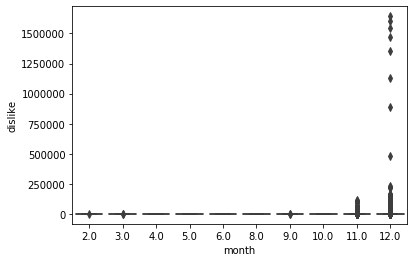

In [5]:
#Q3 Plot the boxplot of #dislikes for each month in 2017. (10%)
dislike=[]

for i in range(df.shape[0]):
    try:
        if "2017" in df["publish_time"].loc[i]:
            if "2017-01" in df["publish_time"].loc[i]:
                dislike.append([1,float(df["dislikes"].loc[i])])
            elif "2017-02" in df["publish_time"].loc[i]:
                dislike.append([2,float(df["dislikes"].loc[i])])
            elif "2017-03" in df["publish_time"].loc[i]:
                dislike.append([3,float(df["dislikes"].loc[i])])
            elif "2017-04" in df["publish_time"].loc[i]:
                dislike.append([4,float(df["dislikes"].loc[i])])
            elif "2017-05" in df["publish_time"].loc[i]:
                dislike.append([5,float(df["dislikes"].loc[i])])
            elif "2017-06" in df["publish_time"].loc[i]:
                dislike.append([6,float(df["dislikes"].loc[i])])
            elif "2017-07" in df["publish_time"].loc[i]:
                dislike.append([7,float(df["dislikes"].loc[i])])
            elif "2017-08" in df["publish_time"].loc[i]:
                dislike.append([8,float(df["dislikes"].loc[i])])
            elif "2017-09" in df["publish_time"].loc[i]:
                dislike.append([9,float(df["dislikes"].loc[i])])
            elif "2017-10" in df["publish_time"].loc[i]:
                dislike.append([10,float(df["dislikes"].loc[i])])
            elif "2017-11" in df["publish_time"].loc[i]:
                dislike.append([11,float(df["dislikes"].loc[i])])
            elif "2017-12" in df["publish_time"].loc[i]:
                dislike.append([12,float(df["dislikes"].loc[i])])
    except:
        pass
    
month_dislike = pd.DataFrame(np.array(dislike) , columns=["month","dislike"])
sns.boxplot(x=month_dislike["month"],y=month_dislike["dislike"],data=month_dislike)

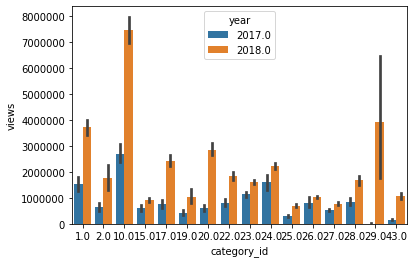

In [6]:
#Q4 Plot the histogram of #views for each category in 2017 and 2018 in one figure. (10%)
category_view = []
for i in range(df.shape[0]):
    try:
        if "2017" in df["publish_time"].loc[i]:
            category_view.append([2017,int(df["category_id"].loc[i]),float(df["views"].loc[i])])
        elif "2018" in df["publish_time"].loc[i]:
            category_view.append([2018,int(df["category_id"].loc[i]),float(df["views"].loc[i])])
    except:
        pass

category_view = pd.DataFrame(np.array(category_view),columns=["year","category_id","views"])
sns.barplot(x="category_id",y="views",data=category_view,hue="year")

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (8,9,12,13,20,21,29,30,31,32,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<function matplotlib.pyplot.show(*args, **kw)>

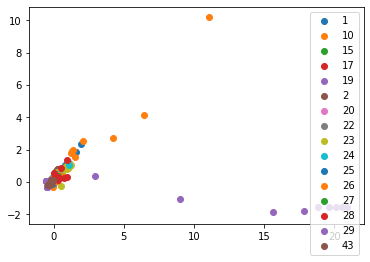

In [7]:
#Q5 Write a myPCA.py from scratch. (50%)
res = myPCA.myPCA("USvideos.csv",2)

category_group = res.groupby("Y")
for category,group in category_group:
    plt.scatter(group["PC1"],group["PC2"],label=category)
plt.legend(loc = 'upper right')
plt.show

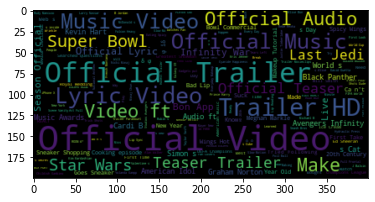

In [15]:
#Q6 Plot the word cloud of “title”. (15%)
text = ""
for i in range(df.shape[0]):
    text += df["title"].loc[i]
    
text = ' '.join(nltk.word_tokenize(text))
cloud = WordCloud().generate(text)
plt.imshow(cloud, interpolation='bilinear')